# Cancer Detection
All of our bodies are composed of cells. As we grow older,throughout a lifetime, we go through this kind of situation where a particular kind of gene is mutated where the protein that it makes is abnormal and drives the cell to behave in a different way that we call cancer. In this case, we need to predict which data is categorized into: 2 for benign and 4 for malignant.

In [1]:
#important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#model library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#evaluation
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset/breastCancer.csv')
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.shape

(699, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


There isn't missing value in the data but we have to check **bare_nucleoli**. We know all the data is int64, but the type of bare_nucleoli is object(string). What's wrong with this data.

## Preprocessing

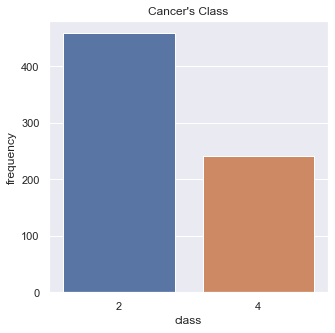

In [5]:
plt.figure(figsize=(5,5))
sns.countplot(df['class'])
plt.ylabel('frequency')
plt.title("Cancer's Class")
plt.show()

The data not really balance, we can try an experimence when build model. We can try to build model with actual data or balancing data.

Check the **bare_nucleoli**

In [6]:
df.bare_nucleoli.value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

There are some missing values (assign with ?). So we have to replace "?" with Nan (null value) and handle the missing value by its median.

In [7]:
#replace ? with null value
df.bare_nucleoli = df.bare_nucleoli.replace('?',np.nan)

In [8]:
#check the number of missing value
df.isnull().sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

In [9]:
#Missing value handling (fill by median)
df.bare_nucleoli = df.bare_nucleoli.fillna(df.bare_nucleoli.median())

In [10]:
#convert the data type from object to int
df.bare_nucleoli = df.bare_nucleoli.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 699 non-null    int64
 1   clump_thickness    699 non-null    int64
 2   size_uniformity    699 non-null    int64
 3   shape_uniformity   699 non-null    int64
 4   marginal_adhesion  699 non-null    int64
 5   epithelial_size    699 non-null    int64
 6   bare_nucleoli      699 non-null    int64
 7   bland_chromatin    699 non-null    int64
 8   normal_nucleoli    699 non-null    int64
 9   mitoses            699 non-null    int64
 10  class              699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


## Exploratory Data Analysis (EDA)

In [11]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


**Drop the ID**, it just data labe. There isn't information inside of it

In [12]:
df.drop('id', axis=1, inplace=True)
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [13]:
#show descriptive statistic from all the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


**There isn't anomaly data** (negative value) 

**Bivariate Data Analysis** (Dealing with 2 variables)

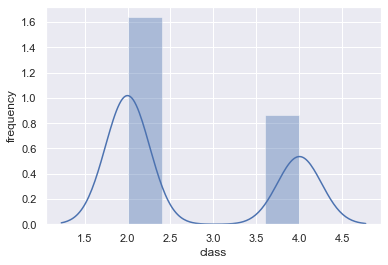

In [14]:
sns.distplot(df['class']);
plt.ylabel('frequency');

**Multivariate Data Analysis** (Dealing with more than 2 variables)

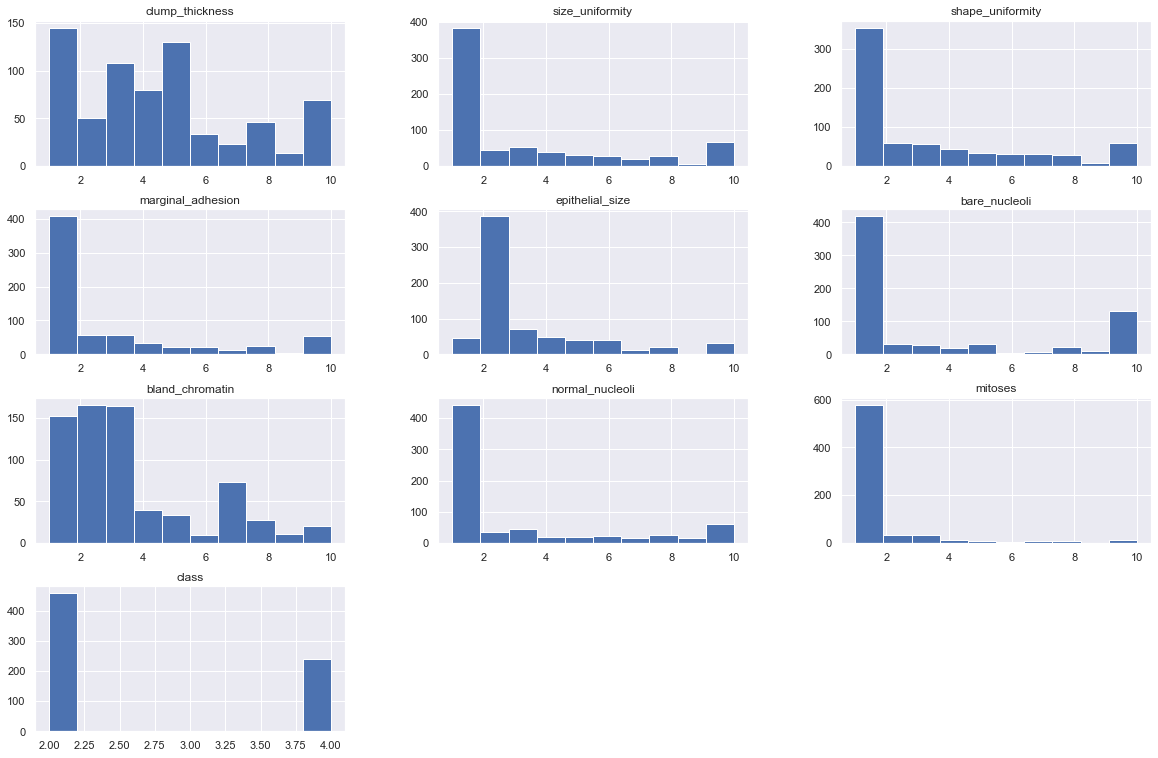

In [15]:
df.hist(bins=10, figsize=(20,20), layout=(6,3));

This Analysis shows us how the distribution of each variable is

**Check the outlier**

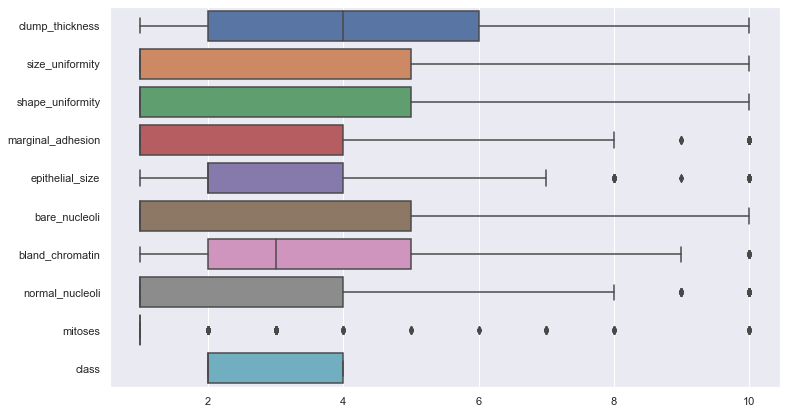

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, orient='h');

I think the number of outliers isn't too much, and it is still normal because the data range is 1-10. So I don't need to drop the outlier.

**Matrix correlation** (using heatmap)

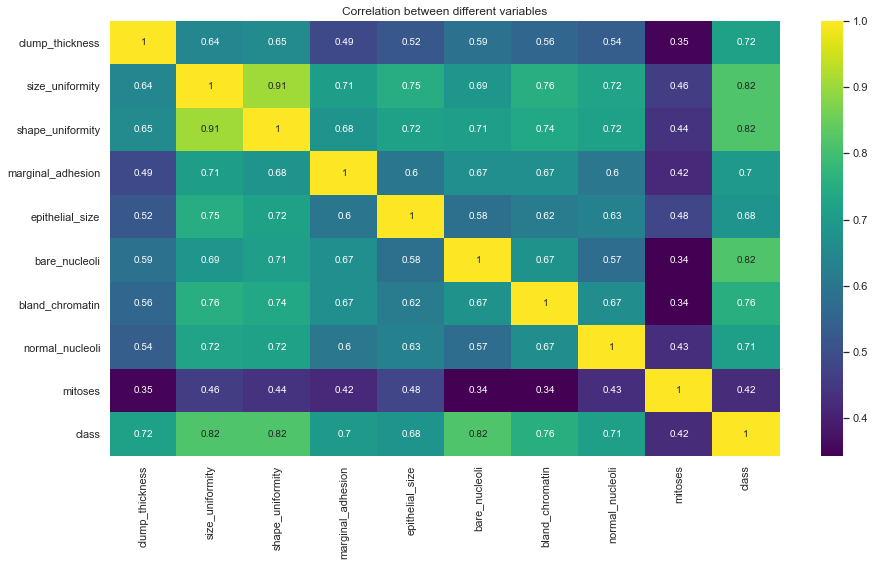

In [17]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), vmax=1, annot=True, cmap='viridis')
plt.title('Correlation between different variables')
plt.show()

**Multicollinearity** is the condition in which the independent variable has a high correlation with other independent variables. If this happens in our dataset, we need to delete one of them. Based on the correlation matrix above, we can see that size_uniformity and shape_uniformity has high correlation.

In [18]:
df_new = df.drop('shape_uniformity', axis=1)

## Build Machine Learning Model

**Split the data into train and test**

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.25, random_state=24)

#drop multicollinearity
xn_train, xn_test, yn_train, yn_test = train_test_split(df_new.drop('class', axis=1), df_new['class'], test_size=0.25, random_state=24)

**Make classificagtion function**

In [20]:
class Classification(object):
    def __init__(self, clf, params=None):
        if params:
            self.clf = clf(**params)
        else:
            self.clf = clf()
    
    def build_grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv=Kfold, n_jobs=-1, verbose=2)
    
    def grid_fit(self, X, Y):
        self.grid.fit(X,Y)
        print("Best Parameter: ")
        print(self.grid.best_estimator_,'\n')
    
    def grid_predict_train(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Training Accuracy\t: {:.2f}%".format(100*accuracy_score(Y, self.predictions)))
        print("Train F1-score\t\t: {:.2f}% \n".format(100*f1_score(Y, self.predictions, average='weighted')))
        return 100*accuracy_score(Y, self.predictions)
        
    def grid_predict_test(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Testing Accuracy\t: {:.2f}%".format(100*accuracy_score(Y, self.predictions)))
        print("Testing F1-score\t: {:.2f}% \n".format(100*f1_score(Y, self.predictions, average='weighted')))
        print(classification_report(Y, self.predictions, target_names=['Class 2', 'Class 4']))

        confusion = confusion_matrix(Y, self.predictions)
        print('Confusion Matrix\n')
        sns.heatmap(confusion, annot=True, cmap='YlGn', fmt=".0f")
        return 100*accuracy_score(Y, self.predictions)
    
    def grid_predict_data(self, X):
        return self.grid.predict(X)

In [21]:
#temporary for accuracy
train_acc, test_acc, train_m_acc, test_m_acc = [],[],[],[]

**KNN**

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


Best Parameter: 
KNeighborsClassifier(leaf_size=25) 

Training Accuracy	: 97.71%
Train F1-score		: 97.72% 

Testing Accuracy	: 98.86%
Testing F1-score	: 98.86% 

              precision    recall  f1-score   support

     Class 2       0.99      0.99      0.99       117
     Class 4       0.98      0.98      0.98        58

    accuracy                           0.99       175
   macro avg       0.99      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175

Confusion Matrix



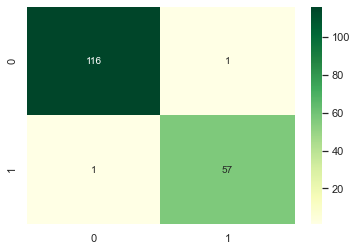

In [22]:
knn = Classification(clf = KNeighborsClassifier)
params = {'n_neighbors': np.arange(5,25,5),
          'leaf_size':np.arange(25,50,5),
          'p':[1,2]}

knn.build_grid_search(parameters = params, Kfold = 5)
knn.grid_fit(x_train, y_train)
accuracy_train = knn.grid_predict_train(x_train, y_train)
accuracy_test = knn.grid_predict_test(x_test, y_test)
train_acc.append(accuracy_train)
test_acc.append(accuracy_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


Best Parameter: 
KNeighborsClassifier(leaf_size=25) 

Training Accuracy	: 97.33%
Train F1-score		: 97.34% 

Testing Accuracy	: 98.29%
Testing F1-score	: 98.29% 

              precision    recall  f1-score   support

     Class 2       0.99      0.98      0.99       117
     Class 4       0.97      0.98      0.97        58

    accuracy                           0.98       175
   macro avg       0.98      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175

Confusion Matrix



[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.4s finished


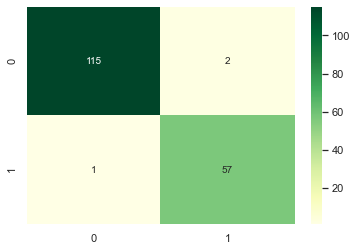

In [23]:
knn = Classification(clf = KNeighborsClassifier)
params = {'n_neighbors': np.arange(5,25,5),
          'leaf_size':np.arange(25,50,5),
          'p':[1,2]}

knn.build_grid_search(parameters = params, Kfold = 5)
knn.grid_fit(xn_train, yn_train)
accuracy_train = knn.grid_predict_train(xn_train, yn_train)
accuracy_test = knn.grid_predict_test(xn_test, yn_test)
train_m_acc.append(accuracy_train)
test_m_acc.append(accuracy_test)

**SVM**

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameter: 
SVC(C=1, class_weight='balanced') 

Training Accuracy	: 96.76%
Train F1-score		: 96.78% 



[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished


Testing Accuracy	: 98.29%
Testing F1-score	: 98.30% 

              precision    recall  f1-score   support

     Class 2       1.00      0.97      0.99       117
     Class 4       0.95      1.00      0.97        58

    accuracy                           0.98       175
   macro avg       0.98      0.99      0.98       175
weighted avg       0.98      0.98      0.98       175

Confusion Matrix



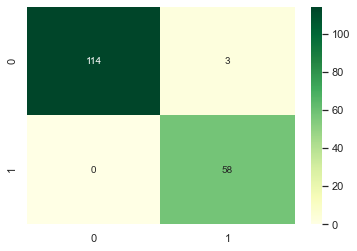

In [24]:
svm = Classification(clf = SVC)
params = {'C': [0.001, 0.1, 1],
          'kernel':['linear', 'rbf'],
          'class_weight':['None', 'dict', 'balanced']}
svm.build_grid_search(parameters = params, Kfold = 5)
svm.grid_fit(x_train, y_train)
accuracy_train = svm.grid_predict_train(x_train, y_train)
accuracy_test = svm.grid_predict_test(x_test, y_test)
train_acc.append(accuracy_train)
test_acc.append(accuracy_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameter: 
SVC(C=0.001, class_weight='balanced', kernel='linear') 

Training Accuracy	: 96.76%
Train F1-score		: 96.76% 

Testing Accuracy	: 98.86%
Testing F1-score	: 98.86% 

              precision    recall  f1-score   support

     Class 2       0.99      0.99      0.99       117
     Class 4       0.98      0.98      0.98        58

    accuracy                           0.99       175
   macro avg       0.99      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175

Confusion Matrix



[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished


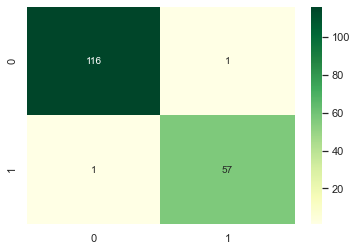

In [25]:
svm = Classification(clf = SVC)
params = {'C': [0.001, 0.1, 1],
          'kernel':['linear', 'rbf'],
          'class_weight':['None', 'dict', 'balanced']}
svm.build_grid_search(parameters = params, Kfold = 5)
svm.grid_fit(xn_train, yn_train)
accuracy_train = svm.grid_predict_train(xn_train, yn_train)
accuracy_test = svm.grid_predict_test(xn_test, yn_test)
train_m_acc.append(accuracy_train)
test_m_acc.append(accuracy_test)

**Random Forest**

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   24.8s finished


Best Parameter: 
RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=300) 

Training Accuracy	: 98.85%
Train F1-score		: 98.86% 

Testing Accuracy	: 98.29%
Testing F1-score	: 98.28% 

              precision    recall  f1-score   support

     Class 2       0.98      0.99      0.99       117
     Class 4       0.98      0.97      0.97        58

    accuracy                           0.98       175
   macro avg       0.98      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175

Confusion Matrix



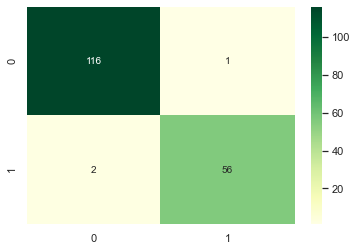

In [26]:
rf = Classification(clf = RandomForestClassifier)
params = {'min_samples_leaf': [2, 3],
          'min_samples_split':[2,3],
          'n_estimators': [100,200,300],
          'criterion': ['entropy','gini'],
          'max_features': ["auto", "sqrt", "log2"]}
rf.build_grid_search(parameters = params, Kfold = 5)
rf.grid_fit(x_train, y_train)
accuracy_train = rf.grid_predict_train(x_train, y_train)
accuracy_test = rf.grid_predict_test(x_test, y_test)
train_acc.append(accuracy_train)
test_acc.append(accuracy_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   26.4s finished


Best Parameter: 
RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       n_estimators=300) 

Training Accuracy	: 98.28%
Train F1-score		: 98.29% 

Testing Accuracy	: 98.29%
Testing F1-score	: 98.28% 

              precision    recall  f1-score   support

     Class 2       0.98      0.99      0.99       117
     Class 4       0.98      0.97      0.97        58

    accuracy                           0.98       175
   macro avg       0.98      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175

Confusion Matrix



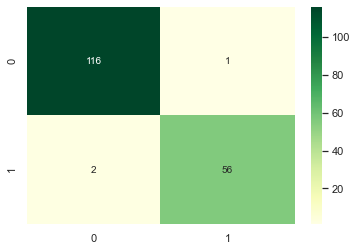

In [27]:
rf = Classification(clf = RandomForestClassifier)
params = {'min_samples_leaf': [2, 3],
          'min_samples_split':[2,3],
          'n_estimators': [100,200,300],
          'criterion': ['entropy','gini'],
          'max_features': ["auto", "sqrt", "log2"]}
rf.build_grid_search(parameters = params, Kfold = 5)
rf.grid_fit(xn_train, yn_train)
accuracy_train = rf.grid_predict_train(xn_train, yn_train)
accuracy_test = rf.grid_predict_test(xn_test, yn_test)
train_m_acc.append(accuracy_train)
test_m_acc.append(accuracy_test)

### Comperation

In [28]:
print("\t\t    ====== KNN ====== | ===== SVM ===== | ====== RF ======")
print("train\t\t: ", train_acc)
print("test\t\t: ", test_acc)
print("train_drop\t: ", train_m_acc)
print("test_drop\t: ", test_m_acc)

		    ====== KNN ====== | ===== SVM ===== | ====== RF ======
train		:  [97.70992366412213, 96.7557251908397, 98.85496183206108]
test		:  [98.85714285714286, 98.28571428571429, 98.28571428571429]
train_drop	:  [97.32824427480917, 96.7557251908397, 98.2824427480916]
test_drop	:  [98.28571428571429, 98.85714285714286, 98.28571428571429]


In [29]:
train_acc

[97.70992366412213, 96.7557251908397, 98.85496183206108]

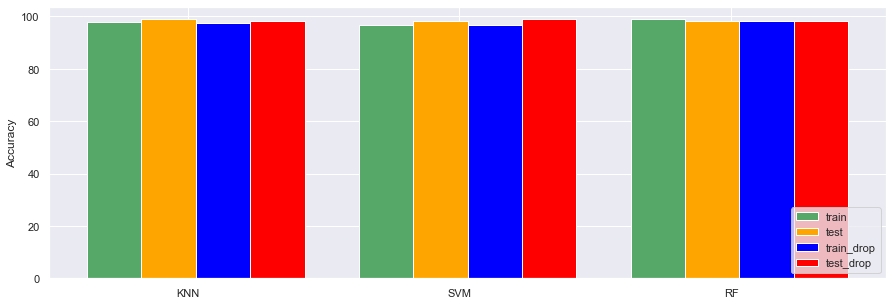

In [30]:
model_used = ['KNN','SVM','RF']
list_com = np.arange(len(model_used))
list_com

plt.figure(figsize=(15,5))
plt.xticks(list_com, model_used) #change the xticks by it index and name
plt.bar(list_com-0.27, train_acc, color='g', label='train', width=0.2)
plt.bar(list_com-0.07, test_acc, color='orange', label='test', width=0.2)
plt.bar(list_com+0.13, train_m_acc, color='blue', label='train_drop', width=0.2)
plt.bar(list_com+0.33, test_m_acc, color='red', label='test_drop', width=0.2)
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

### Conclusion
- All the classifiers have a high accuracy and it doesn't overfit or underfit
- Check the confusion matrix, to choose the best classifier you can use KNN or SVM_drop_feature because both have the smallest error rate (2)